<a href="https://colab.research.google.com/github/plaban1981/Fastai/blob/master/fruit_classification_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruits 360 dataset: A dataset of images containing fruits and vegetables
https://www.kaggle.com/moltean/fruits?

# Dataset properties
Total number of images: 90483.

**Training set size:** 67692 images (one fruit or vegetable per image).

**Test set size: **22688 images (one fruit or vegetable per image).

**Multi-fruits set size: **103 images (more than one fruit (or fruit class) per image)

**Number of classes:** 131 (fruits and vegetables).

**Image size:** 100x100 pixels.

Filename format: imageindex100.jpg (e.g. 32100.jpg) or rimageindex100.jpg (e.g. r32100.jpg) or r2imageindex100.jpg or r3imageindex100.jpg. "r" stands for rotated fruit. "r2" means that the fruit was rotated around the 3rd axis. "100" comes from image size (100x100 pixels).

Different varieties of the same fruit (apple for instance) are stored as belonging to different classes.

# Repository structure

Folders Training and Test contain images for training and testing purposes.

**Folder test-multiple_fruits contains** images with multiple fruits. Some of them are partially covered by other fruits. This is an excelent test for real-world detection.

Folder src/image_classification contains the python code for training the neural network. It uses the TensorFlow library.

Folder src/utils contains the C++ code used for extracting the fruits or vegetables from background.

Folder papers contains the research papers related to this dataset.

In [1]:
from fastai import *
from fastai.vision import *


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip '/content/drive/My Drive/kaggle/5857_1166105_bundle_archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
path = '/content/fruits-360/'
data = ImageDataBunch.from_folder(path=path,
                                  train='/content/fruits-360/Training',
                                  valid_pct = 0.2,
                                  test = '/content/fruits-360/Test',
                                  ds_tfms= get_transforms(),
                                  size=224,
                                  bs=32).normalize(imagenet_stats)

## Data Label Values and Number of possible label attributes

In [61]:
print(f'Label Values :{data.classes}')
print(f'number of label :{data.c}')

Label Values :['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Ma

#Visualizations

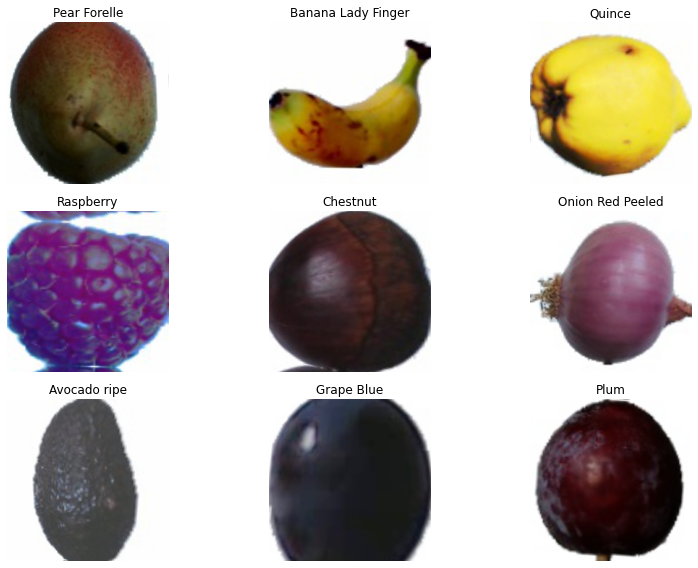

In [62]:
data.show_batch(rows=3,figsize=(12,8))

In [63]:
print(len(data.train_ds))
print(len(data.valid_ds))


54236
13559


In [64]:
data

ImageDataBunch;

Train: LabelList (54236 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Eggplant,Eggplant,Eggplant,Eggplant,Eggplant
Path: /content/fruits-360;

Valid: LabelList (13559 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Chestnut,Grape White 3,Potato Red Washed,Rambutan,Grape White 2
Path: /content/fruits-360;

Test: LabelList (22688 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/fruits-360

# Train Model

In [33]:
learn = create_cnn(data,models.resnet34,metrics=accuracy)

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


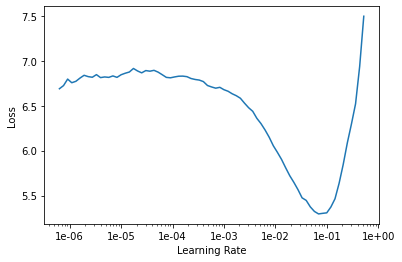

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(1,slice(1e-3,1e-2))

In [37]:
learn.save('stage-1')

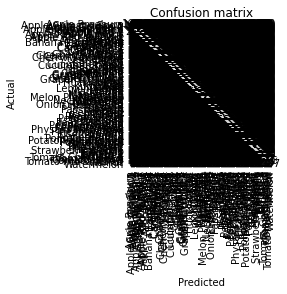

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

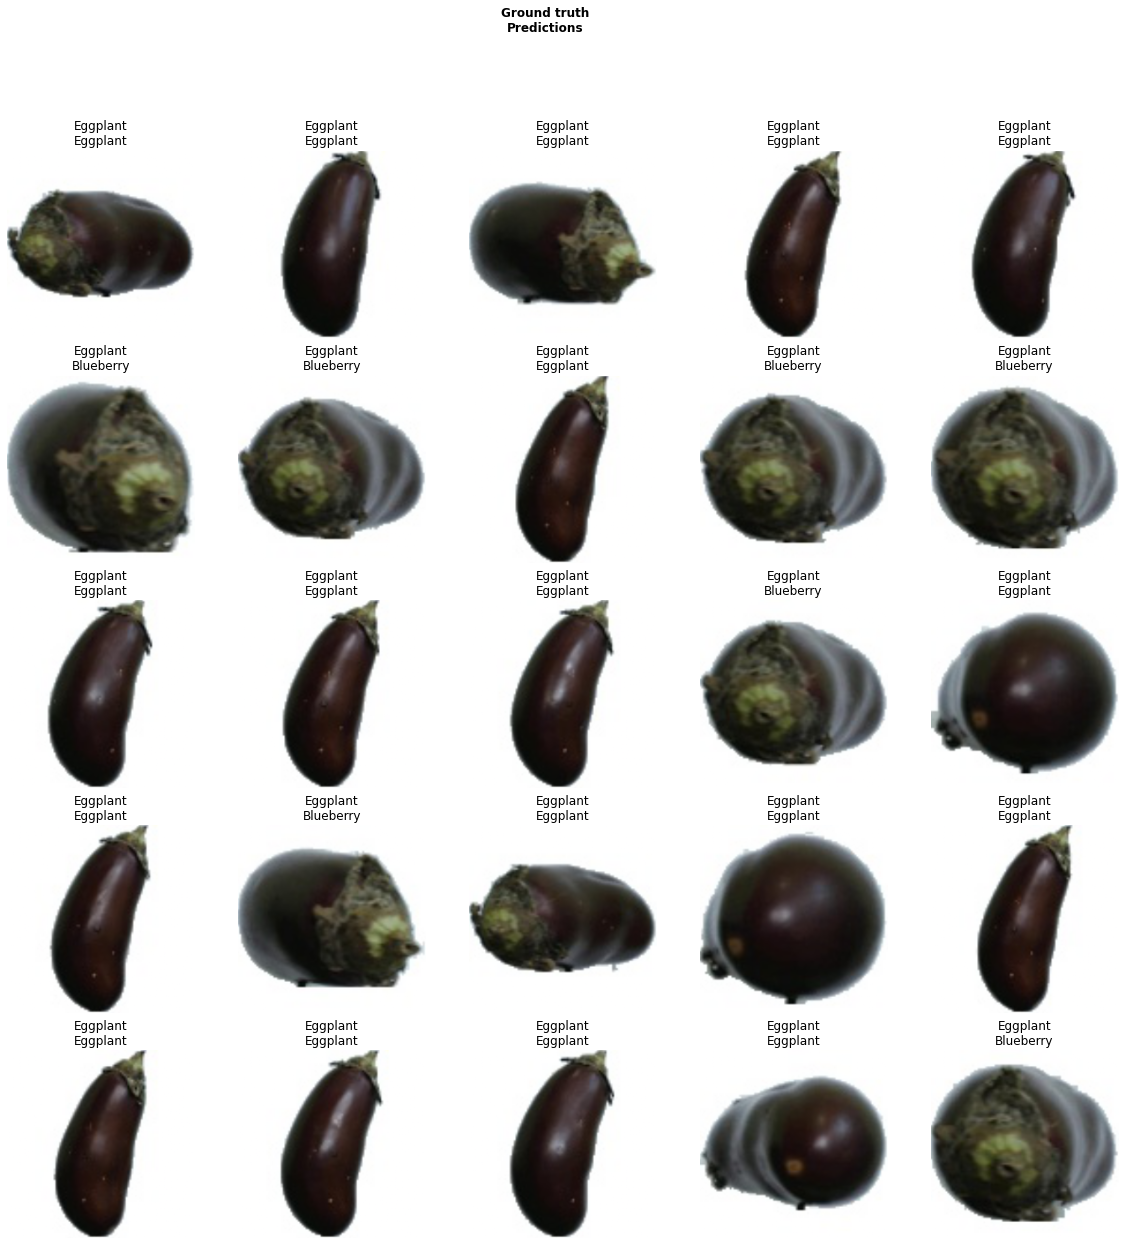

In [40]:
learn.show_results()

In [41]:
learn.unfreeze()
learn.fit_one_cycle(1,slice(1e-3,1e-2))

In [42]:
learn.save('stage-2')

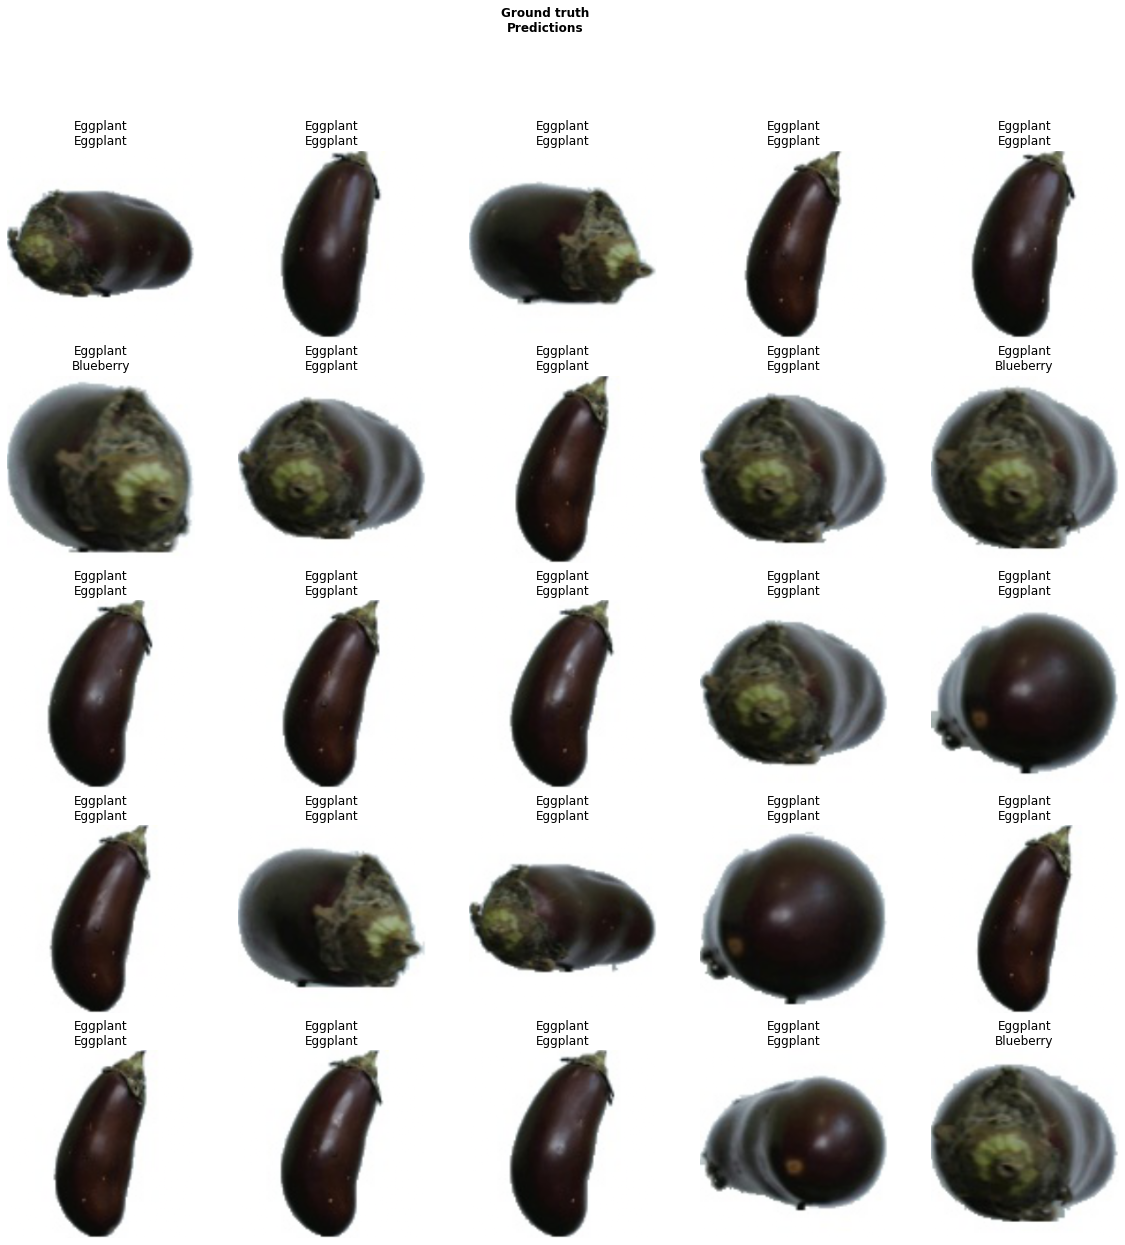

In [43]:
learn.show_results()

## Make Predictions on the test data

In [44]:
preds, y = learn.get_preds(DatasetType.Test)

In [46]:
preds

tensor([[1.3789e-22, 2.4561e-22, 2.3695e-19,  ..., 1.2910e-12, 3.3387e-17,
         1.8677e-02],
        [9.0089e-12, 4.9036e-15, 2.7697e-11,  ..., 6.4169e-14, 1.6403e-17,
         6.8856e-10],
        [1.4833e-14, 5.4753e-15, 2.3620e-12,  ..., 1.5068e-12, 4.0691e-14,
         4.4892e-08],
        ...,
        [3.5212e-22, 1.8326e-24, 6.2328e-21,  ..., 5.0544e-09, 7.5352e-22,
         4.1303e-05],
        [5.0863e-17, 7.4848e-22, 3.0409e-14,  ..., 4.9232e-13, 2.5099e-10,
         3.3182e-05],
        [3.2237e-21, 3.0319e-20, 3.5574e-19,  ..., 4.5684e-12, 5.1330e-16,
         9.8648e-01]])

In [51]:
data.classes[preds[0].argmax().item()],data.classes[preds[1].argmax().item()],data.classes[preds[2].argmax().item()]

('Rambutan', 'Cucumber Ripe', 'Tomato 1')

# Visualize Predictions

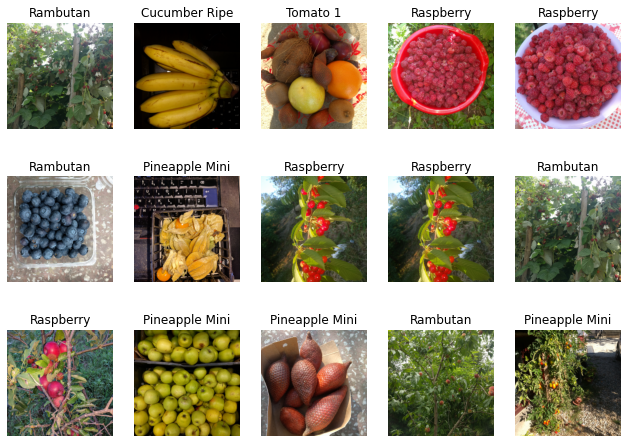

In [50]:
_,axs = plt.subplots(3,5,figsize=(11,8))
for i,ax in enumerate(axs.flatten()): 
  img = data.test_ds[i][0]
  img.show(ax=ax,y=learn.predict(img)[0])

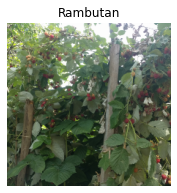

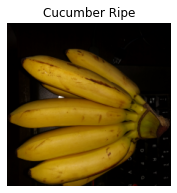

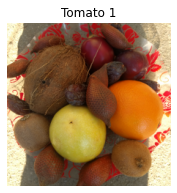

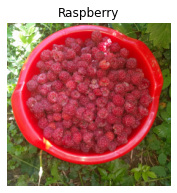

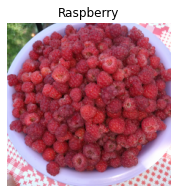

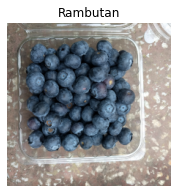

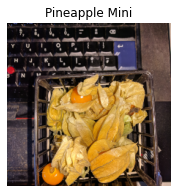

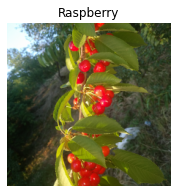

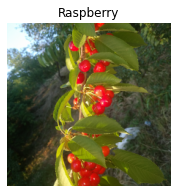

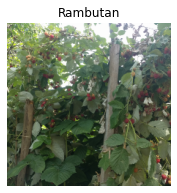

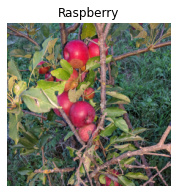

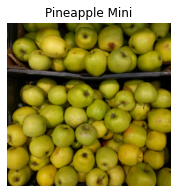

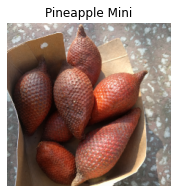

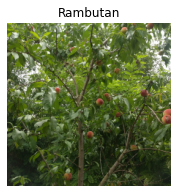

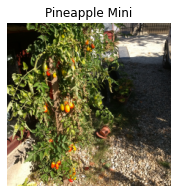

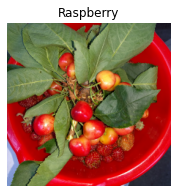

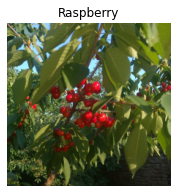

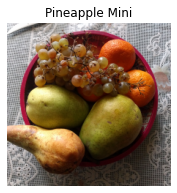

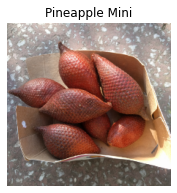

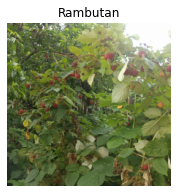

In [52]:
for i in range(20):
  img = data.test_ds[i][0]
  img.show(y=learn.predict(img)[0])